In [28]:
#main code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv('cyberthreat.csv')

# Data preprocessing
data['Target Variable'] = data['Target Variable'].apply(lambda x: 1 if x == 'Phishing' else 0)
X = data[['Packet Size', 'Source Port', 'Destination Port', 'Sender ID', 'Receiver ID']]
y = data['Target Variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model to simulate phishing detection
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       134
           1       0.46      0.38      0.41        16

    accuracy                           0.89       150
   macro avg       0.69      0.66      0.68       150
weighted avg       0.88      0.89      0.88       150



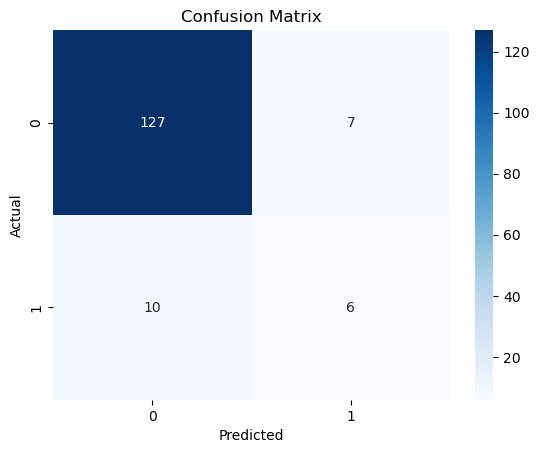

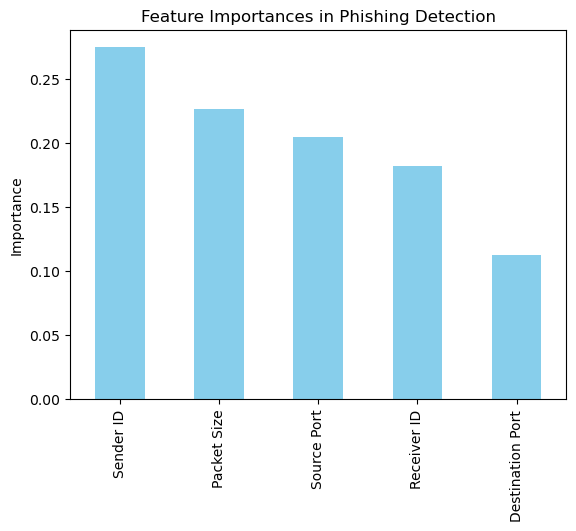

In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Analysis
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importances in Phishing Detection')
plt.ylabel('Importance')
plt.show()




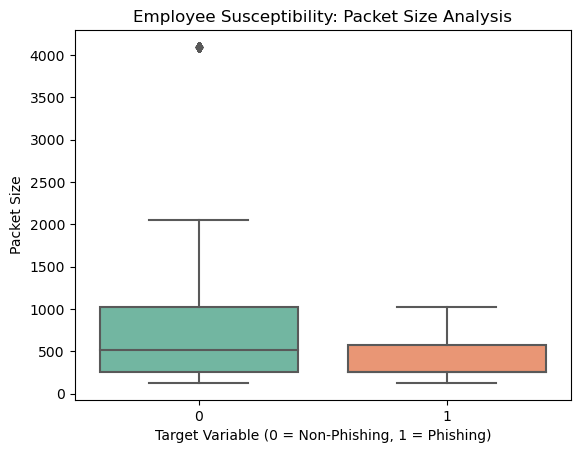

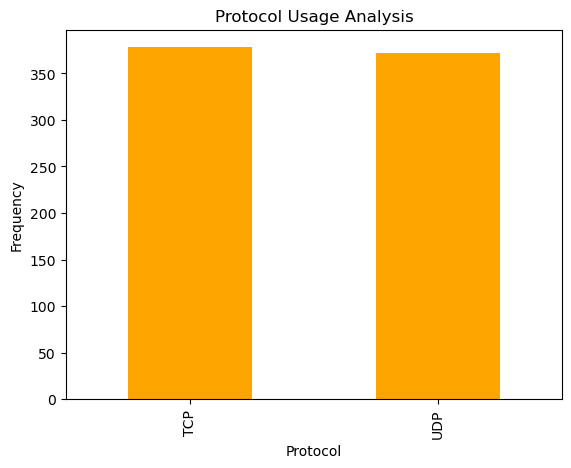

In [27]:
# Visualize employee susceptibility (Packet Size Distribution)
sns.boxplot(x='Target Variable', y='Packet Size', data=data, palette='Set2')
plt.title('Employee Susceptibility: Packet Size Analysis')
plt.xlabel('Target Variable (0 = Non-Phishing, 1 = Phishing)')
plt.ylabel('Packet Size')
plt.show()

# Analyze Protocol Usage and Phishing Distribution
protocol_counts = data['Protocol'].value_counts()
protocol_counts.plot(kind='bar', color='orange')
plt.title('Protocol Usage Analysis')
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.show()



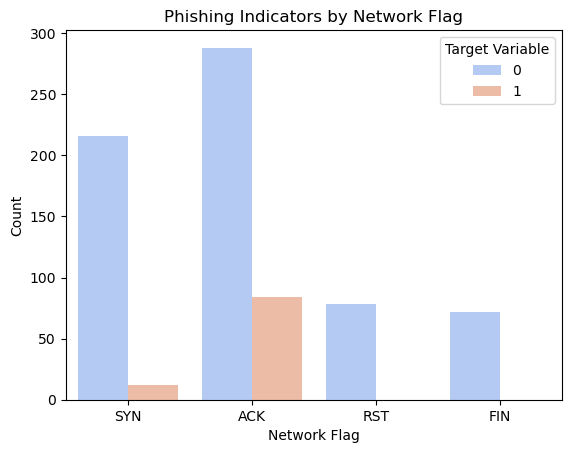

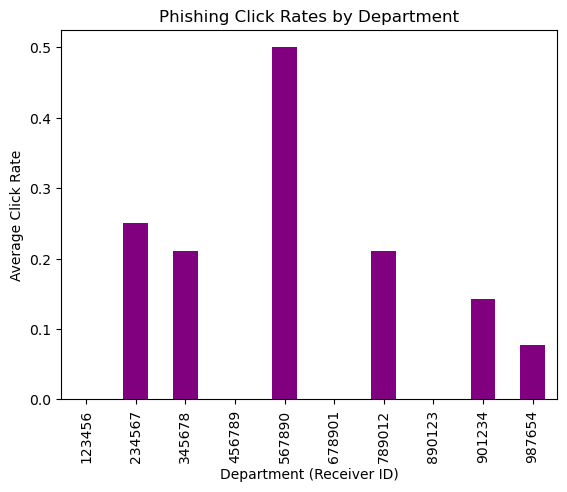

In [26]:
# Simulate Phishing Scenarios
sns.countplot(x='Flag', hue='Target Variable', data=data, palette='coolwarm')
plt.title('Phishing Indicators by Network Flag')
plt.xlabel('Network Flag')
plt.ylabel('Count')
plt.show()

# Optimize future training efforts
click_rate_by_department = data.groupby('Receiver ID')['Target Variable'].mean()
click_rate_by_department.plot(kind='bar', color='purple')
plt.title('Phishing Click Rates by Department')
plt.xlabel('Department (Receiver ID)')
plt.ylabel('Average Click Rate')
plt.show()

In [14]:
import sqlite3
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming the data is already loaded into `data_from_db`
X = data_from_db[['packet_size', 'source_port', 'destination_port', 'sender_id', 'receiver_id']]
y = data_from_db['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Connect to the SQLite database
conn = sqlite3.connect('cyberthreat.db')
cursor = conn.cursor()

# Create the 'phishing_predictions' table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS phishing_predictions (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    prediction INTEGER,
    actual INTEGER
)
''')

# Insert predictions into the table
for pred, actual in zip(y_pred, y_test):
    cursor.execute('''
    INSERT INTO phishing_predictions (prediction, actual)
    VALUES (?, ?)
    ''', (pred, actual))

# Commit and close
conn.commit()
conn.close()

# Print classification report for reference
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       258
           1       0.55      0.55      0.55        42

    accuracy                           0.87       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.87      0.87      0.87       300



In [12]:
# Connect to the database to fetch data
conn = sqlite3.connect('cyberthreat.db')
query = "SELECT packet_size, source_port, destination_port, sender_id, receiver_id, target_variable FROM network_traffic"
data_from_db = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Now, you can use `data_from_db` for your machine learning model
X = data_from_db[['packet_size', 'source_port', 'destination_port', 'sender_id', 'receiver_id']]
y = data_from_db['target_variable']


In [13]:
# After training and predicting, store predictions in SQL
conn = sqlite3.connect('cyberthreat.db')
cursor = conn.cursor()

# Example of storing the predictions
for pred, actual in zip(y_pred, y_test):
    cursor.execute('''
    INSERT INTO phishing_predictions (prediction, actual)
    VALUES (?, ?)
    ''', (pred, actual))

# Commit and close
conn.commit()
conn.close()
